In [1]:
#Importar les llibreries que són necessàries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import log

In [2]:
#Importar la taula de dades. Cal introduir la ruta a la taula de dades i pot ser diferent per a cadascú.
ruta_tauladades = r'D:\Treball de recerca\diabetes_data_upload.csv'
taula_dades = pd.read_csv(ruta_tauladades)

In [3]:
#Mostrar les primeres 10 files
taula_dades.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [4]:
#Obtenir informació de com és la taula
taula_dades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
#Normalitzar la variable "Age" 
mitjana = taula_dades['Age'].mean()
std = taula_dades['Age'].std()
age_norm = np.array((taula_dades['Age'] - mitjana) / std)
taula_dades.insert(1, 'Age_norm', age_norm, allow_duplicates = True)
taula_dades.drop('Age', axis=1, inplace = True)

In [6]:
#Mostrar taula de dades després de la normalització

taula_dades.head(10)

,Age_norm,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.660731,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,0.820572,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,-0.578436,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,-0.249258,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,0.985161,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,0.573688,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,0.738277,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,1.478929,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,1.561223,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,1.808107,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [7]:
# Guardar el valor dels paràmetre m i n i crear la matriu X
[m, n] = taula_dades.shape
X = np.array(taula_dades)
X_pre = np.array(taula_dades)
print(m, n)

520 17


In [8]:
#Convertir totes les variables en tipus "integer" o "float"

for fila in range(0, m, 1):
    for columna in range(0, n, 1):
        if type(X[fila][columna]) == int or type(X[fila][columna]) == float:
            pass
        elif X[fila][columna] == 'Female':
            X[fila][columna] = 0
        elif X[fila][columna] == 'No':
            X[fila][columna] = 0
        elif X[fila][columna] == 'Negative':
            X[fila][columna] = 0        
        else:
            X[fila][columna] = 1

In [9]:
#Mostrar la matriu X abans i després de convertir les dades en tipus "integer" i "float"

print(X[:5])
print(X_pre[:5])

[[-0.6607306605626827 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1]
 [0.8205720898245533 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1]
 [-0.5784360633189474 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1]
 [-0.24925767434400603 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1]
 [0.985161284312024 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]]
[[-0.6607306605626827 'Male' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes'
  'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Positive']
 [0.8205720898245533 'Male' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No'
  'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Positive']
 [-0.5784360633189474 'Male' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes'
  'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Positive']
 [-0.24925767434400603 'Male' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
  'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Positive']
 [0.985161284312024 'Male' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
  'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Positive']]


In [10]:
#Afegir a la matriu X una columna al davant d'1s
x_0 = np.ones((m, 1))
X = np.hstack((x_0, X))

In [11]:
#Mostrar les 5 primeres files de la matriu X resultant
X[:5]

array([[1.0, -0.6607306605626827, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1],
       [1.0, 0.8205720898245533, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 1],
       [1.0, -0.5784360633189474, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1],
       [1.0, -0.24925767434400603, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1],
       [1.0, 0.985161284312024, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1]], dtype=object)

In [12]:
#Calculem quin és el 10% de m (520)
p = int(0.1 * m)

#Creem una matriu X_test que serà la que ens servirà per avaluar el model
X_test = np.zeros((p, n))

#Afegim la columna d'1s a la matriu X_test
x_0_test = np.ones((p, 1))
X_test =  np.hstack((x_0_test, X_test))
print(X_test[:5])

#Omplim X_test amb files de la matriu X
num_indexs = np.rint(np.linspace(0, m - 1, p))
num_indexs = num_indexs[::-1]

i = 0
for index in num_indexs:
    X_test[i] = X[int(index)]
    X = np.delete(X, int(index), 0)
    i += 1
    
#Veiem com queda finalment X_test
print(X_test[:5])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 1.         -0.49614147  1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 1.          0.4913937   1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 1.          1.31433967  1.          0.          0.          0.
   1.          1.          0.          1.          1.          1.
   1.          0.          1.          1.          0.          0.        ]
 [ 1.          0.16221531  0.          0.          0.          0.
   1.          0.          

In [13]:
print(f'Mida de la matriu X: {X.shape}')
print(f'Mida de la matriu X_test: {X_test.shape}')

Mida de la matriu X: (468, 18)
Mida de la matriu X_test: (52, 18)


In [14]:
#Creem el vector y
y = np.zeros((m - p, 1))
for fila in range(0, m - p):
    y[fila] = X[fila][-1]
    
#Creem el vector y_test
y_test = np.zeros((p, 1))
for fila in range(0, p):
    y_test[fila] = X_test[fila][-1]
    
#Esborrem la columna que pertany al valor que es busca predir de les matrius X i X_test
X = np.delete(X, -1, 1)
X_test = np.delete(X_test, -1, 1)

In [15]:
#Ensenyem els 5 primers valors dels vectors y i y_test per comprovar que tinguin els valors que corresponen
print(y[:5])
print(y_test[:5])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [16]:
#Guardar  i mostrar els nous valors dels paràmetres m i n de les dues matrius
[m, n] = X.shape
[m_test, n_test] = X_test.shape

print(f'm: {m}, n: {n}')
print(f'm_test: {m_test}, n_test: {n_test}')

m: 468, n: 17
m_test: 52, n_test: 17


In [17]:
#Creem la funció sigmoide que tant pt rebre un únic nombre, vector o matriu i retornarà la funció sigmoide 
#de tots els valors donats
def sigmoide(z):
    return 1 / (1 + math.e ** (-z))

In [18]:
#Creem la funció hipòtesis que s'encarregarà de retornar la funció sigmoide de la suma ponderada de cada instància
def hipotesis(X, theta):
    return sigmoide(X@theta)

In [19]:
#Creem la funció cost que ens permetrà calcular la precisió de les prediccions del model
def cost(X,theta, y):
    m = y.shape[0]
    prediccions = hipotesis(X, theta)
    J = (-1 / m) * np.sum(y.T @ np.log(prediccions.astype('float')) + (1 - y).T @ np.log(1 - prediccions.astype('float')))
    return J

In [20]:
#Algoritme de Gradient Descent

#Creem la funció gradient que ens retornarà el valor dels gradients de cada valor de theta
def gradient(X, theta, y):
    m = y.shape[0]
    prediccions = hipotesis(X, theta)
    gradient = (1 / m) * (X.T@(prediccions - y))
    return gradient

#Creem la funció encaixar_theta que cridarà la funció gradient i retornara els valors finals de theta i un historial 
#dels valors que va adoptant theta a mesura que passen les iteracions de l'algoritme per a comprovar el seu correcte
#funcionament
def encaixar_theta(X, y, theta, alpha, iteracions):
    J_historial = [cost(X, theta, y)]
    
    for iteració in range(0, iteracions):
        prediccions = hipotesis(X,theta)
        grad = gradient(X, theta, y)
        theta = theta - alpha * grad
        J_historial.append(cost(X, theta, y))
        
    return theta, J_historial

In [21]:
#Ara que ja tenim totes les funcions programades cal veure quins resultats obtenim amb les nostres matrius

#Iniciem uns valors aleatoris per theta
theta = np.random.rand(n, 1)

#Otbenim les prediccions del model amb els valors aleatoris inicials
prediccions = hipotesis(X, theta)

#Establim el valor d'alfa i el nombre d'iteracions
alfa = 0.3
iteracions = 1000

#Cridem finalment la funció encaixar_theta
opt_theta, J_historial = encaixar_theta(X, y, theta, alfa, iteracions)

In [22]:
#Mirem com era el vector theta abans i després d'optimitzar-lo
print(theta)
print(opt_theta)

[[0.65497702]
 [0.19996711]
 [0.57281416]
 [0.05566394]
 [0.04961396]
 [0.84720147]
 [0.24703098]
 [0.78179718]
 [0.61781229]
 [0.98924283]
 [0.66128065]
 [0.30431279]
 [0.24984215]
 [0.15079949]
 [0.96150144]
 [0.24570897]
 [0.04985225]]
[[-0.0018636986501150673]
 [-0.4255311037219026]
 [-3.1556965359837412]
 [3.2075131257189176]
 [3.3690729100212544]
 [0.7552117787446059]
 [0.3978128468908387]
 [0.7751173900136229]
 [1.419305429726375]
 [0.7800684491624822]
 [-1.675393506508189]
 [1.9043441972290676]
 [-0.5489378197663768]
 [1.045460020774119]
 [-0.43606707843659287]
 [-0.0992295521745841]
 [-0.3603146985492325]]


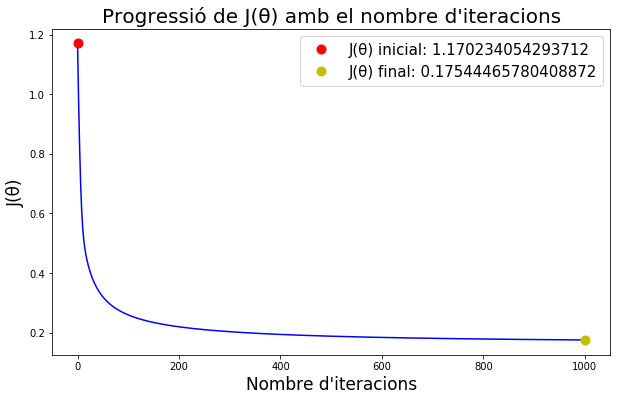

In [23]:
#Creem el gràfic de la funció cost en funció del nombre d'iteracions
plt.figure(figsize=(10, 6))
plt.title('Progressió de J(θ) amb el nombre d\'iteracions', fontsize=20)
plt.ylabel('J(θ)', fontsize=17)
plt.xlabel('Nombre d\'iteracions', fontsize=17)
plt.plot(range(0, iteracions + 1), J_historial, 'b-', linewidth=1.5)
plt.plot(0, J_historial[0], 'ro',
         label=f'J(θ) inicial: {J_historial[0]}', markersize=9)
plt.plot(iteracions, J_historial[-1], 'yo', 
         label=f'J(θ) final: {J_historial[-1]}', markersize=9)
plt.legend(fontsize=15)
plt.savefig('Progressió de J(θ) amb el nombre d\'iteracions.png')
plt.show()

In [24]:
#Comprovarem la precisió del model amb les instàncies reservades per fer el test

#Primer de tot creem una funció que ens permet arrodonir els resultats obtingut en les prediccions
def arrodonir(prediccions):
    for fila in range(0, prediccions.shape[0]):
        if prediccions[fila] >= 0.5:
            prediccions[fila] = 1
        else:
            prediccions[fila] = 0
    return prediccions

#Creem una funció que ens retorni el percentatge de resulats que el model ha predit correctament
def precisio(prediccions, y):
    m = y.shape[0]
    contador = 0
    for fila in range(0, m):
        if prediccions[fila] == y[fila]:
            contador += 1
    precisio = (contador / m) * 100
    return precisio

In [25]:
#Computem i arrodonim les prediccions pels casos test amb els paràmetres theta optimitzats
test_prediccions = hipotesis(X_test, opt_theta)
test_prediccions = arrodonir(test_prediccions)


print(f'Precisió: {precisio(test_prediccions, y_test)}%')

Precisió: 94.23076923076923%
